### Cleaning the dataset

In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [99]:
df = pd.read_csv("hotel_bookings.csv")

In [20]:
df.sample(10)

41410     0.0
111543    0.0
6914      2.0
67137     0.0
81669     0.0
86576     0.0
9881      0.0
106657    0.0
69908     0.0
71635     0.0
Name: children, dtype: float64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

#### There are 4 missing value
#### children - 4 - numerical value - Median/mean to fill the missing 
#### country - 488 - object - categorical data - mode to fill the missing 
#### agent - 16340 - numerical value - Median/mean to fill the missing
#### company - 112593 - large missing value - drop the column

In [24]:
df = df.drop("company", axis =1)

In [25]:
df.shape

(119390, 31)

### Missing value

In [26]:
mean1 = df["children"].mean()
mean1

0.10388990333874994

In [27]:
median1 = df["children"].median()
median1

0.0

### Replacing the data

In [30]:
df["children"]= df["children"].replace(np.nan,median1)

In [31]:
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                             488
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16340
days_in_waiting_list                  0


In [36]:
mean2 = df["agent"].mean()
mean2

86.69338185346919

In [37]:
median2 = df["agent"].median()
median2

14.0

In [39]:
df["agent"]=df["agent"].replace(np.nan,median2)

In [34]:
mode1=df["country"].mode().values[0]
mode1

'PRT'

In [41]:
df["country"]= df["country"].replace(np.nan,mode1)

In [42]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

### all missing value is replaced

## check for duplicates

In [45]:
dup = df.duplicated()
print(dup.sum())

32050


In [46]:
df.drop_duplicates(inplace = True)

In [60]:
df.shape

(87340, 31)

### Outlier

In [93]:
##df.boxplot(column) = ["lead time"]

SyntaxError: cannot assign to function call (1943396752.py, line 1)

In [94]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1-1.5*IQR
    upper_range = Q3+1.5*IQR
    return lower_range, upper_range

In [95]:
low,high=remove_outlier(df["lead_time"])
df["lead_time"] = np.where(df["lead_time"]>high,high,df["lead_time"])
df["lead_time"] = np.where(df["lead_time"]<low,low,df["lead_time"])

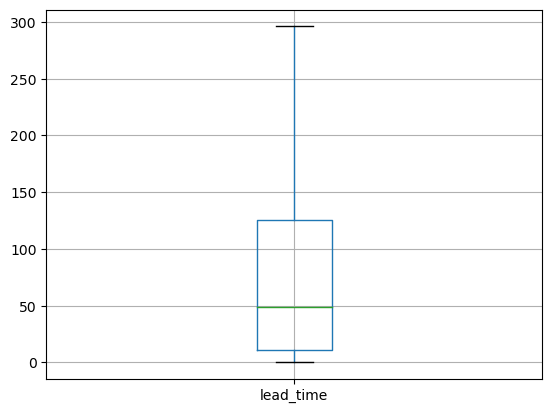

In [96]:
df.boxplot(column=["lead_time"])
plt.show()

### One hot encoding

### converting categorical data into numbers

KeyError: "None of [Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',\n       'distribution_channel', 'reserved_room_type', 'assigned_room_type',\n       'deposit_type', 'customer_type', 'reservation_status',\n       'reservation_status_date'],\n      dtype='object')] are in the [columns]"

In [100]:
df=pd.get_dummies(df,columns=['hotel','arrival_date_month','meal','country','market_segment','distribution_channel','reserved_room_type','assigned_room_type','deposit_type','customer_type','reservation_status','reservation_status_date'])

In [101]:
df.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reservation_status_date_9/26/2015,reservation_status_date_9/26/2016,reservation_status_date_9/27/2015,reservation_status_date_9/27/2016,reservation_status_date_9/28/2015,reservation_status_date_9/28/2016,reservation_status_date_9/29/2015,reservation_status_date_9/29/2016,reservation_status_date_9/30/2015,reservation_status_date_9/30/2016
0,0,342,2015,27,1,0,0,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,737,2015,27,1,0,0,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,7,2015,27,1,0,1,1,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,13,2015,27,1,0,1,1,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,14,2015,27,1,0,2,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
df.dtypes

is_canceled                          int64
lead_time                            int64
arrival_date_year                    int64
arrival_date_week_number             int64
arrival_date_day_of_month            int64
                                     ...  
reservation_status_date_9/28/2016    uint8
reservation_status_date_9/29/2015    uint8
reservation_status_date_9/29/2016    uint8
reservation_status_date_9/30/2015    uint8
reservation_status_date_9/30/2016    uint8
Length: 1187, dtype: object

#### all should be in int,float,uint (above )

### To display all the rows and columns from above convertion